# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Analysis:
1. Weather becomes warmer as we approach the equater. From the plot, the northern hemispher seems to be slightly warmer. 
2. There is not much relationship between latitude and wind speed.
3. There is not much relationship between latitude and cloudiness.
4. There is not much relationship between latitude and humidity.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Set up url for API call
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#Create a Dataframe to hold the data
cities_df = pd.DataFrame(cities, columns = ["City"])
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Humidity"] = ""
cities_df["Cloudiness"] = ""
cities_df["Wind Speed"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
record_count = 1
set_count = 1

# Loop through the list of cities and perform a request for data on each city
# This will take a while to run
print("Beginning Data Retrieval     ")
print("-----------------------------")
for index, row in cities_df.iterrows():
    if (record_count % 50 == 0 and record_count >= 50):
        set_count += 1
        record_count = 0
    city = row["City"]
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1

    #response = requests.get(query_url + city).json()
    #Use try/except to skip any cities with errors
    try:
        response = requests.get(query_url + city).json()
        cities_df.loc[index, "Lat"] = response["coord"]["lat"]
        cities_df.loc[index, "Lng"] = response["coord"]["lon"]
        cities_df.loc[index, "Max Temp"] = response["main"]["temp_max"]
        cities_df.loc[index, "Humidity"] = response["main"]["humidity"]
        cities_df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        cities_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
        cities_df.loc[index, "Country"] = response["sys"]["country"]
        cities_df.loc[index, "Date"] = response["dt"]
    except :
        print("City not found. Skipping...")
        pass
    
print(f'{cities_df.shape} Data Retrieval Complete')

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | victoria
Processing Record 2 of Set 1 | tiarei
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | sorland
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | sulangan
Processing Record 7 of Set 1 | cidreira
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 1 | narsaq
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | tuatapere
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | balykshi
Processing Record 16 of Set 1 | pevek
Processing Record 17 of Set 1 | spas-klepiki
Processing Record 18 of Set 1 | roebourne
Processing Record 19 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 20 of Set 1 | kapuskasing
Processing Record 21 of Set 1 | ushuaia
Processing Record 

In [ ]:
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,petropavlovsk-kamchatskiy,53.0452,158.6483,13.33,67,75,2,RU,1663050699
1,saskylakh,71.9167,114.0833,1.93,97,100,1.71,RU,1663050700
2,belushya guba,,,,,,,,
3,ushuaia,-54.8,-68.3,5.81,52,20,5.66,AR,1663051095
4,port alfred,-33.5906,26.891,15.1,72,15,2.24,ZA,1663050593


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
# Convert the data to numeric
numeric=["Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Date"]
cities_df[numeric]=cities_df[numeric].apply(pd.to_numeric, errors='coerce', axis=1)
# Drop any rows with missing data
clean_cities_df = cities_df.dropna()
# Export the city data into a .csv.
clean_cities_df.to_csv("output_data/cities_df.csv")
clean_cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,petropavlovsk-kamchatskiy,53.0452,158.6483,13.33,67.0,75.0,2.00,RU,1.663051e+09
1,saskylakh,71.9167,114.0833,1.93,97.0,100.0,1.71,RU,1.663051e+09
3,ushuaia,-54.8000,-68.3000,5.81,52.0,20.0,5.66,AR,1.663051e+09
4,port alfred,-33.5906,26.8910,15.10,72.0,15.0,2.24,ZA,1.663051e+09
5,hithadhoo,-0.6000,73.0833,27.82,70.0,12.0,2.64,MV,1.663051e+09


In [ ]:
#Summery statistics of dataframe
clean_cities_df.describe(exclude = 'object')

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,19.915147,24.859734,19.191057,69.679211,56.711470,3.572760,1.663051e+09
std,33.772854,90.521955,8.712374,22.199745,41.144413,2.471863,1.263690e+02
min,-54.800000,-175.200000,-0.940000,3.000000,0.000000,0.000000,1.663050e+09
25%,-7.897000,-58.102025,12.130000,59.000000,11.250000,1.795000,1.663051e+09
50%,26.071350,27.295700,21.050000,76.000000,73.500000,3.090000,1.663051e+09
75%,47.612450,107.268275,26.020000,87.000000,100.000000,4.690000,1.663051e+09
max,78.218600,179.316700,37.160000,100.000000,100.000000,13.530000,1.663051e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.
#cities_df["Humidity"] = pd.to_numeric(cities_df["Humidity"])
humidity100 = clean_cities_df.loc[clean_cities_df["Humidity"] > 100].index
humidity100


Int64Index([], dtype='int64')

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_cities_df = cities_df.drop(index = humidity100, inplace=False)
clean_cities_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,petropavlovsk-kamchatskiy,53.0452,158.6483,13.33,67.0,75.0,2.00,RU,1.663051e+09
1,saskylakh,71.9167,114.0833,1.93,97.0,100.0,1.71,RU,1.663051e+09
2,belushya guba,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
3,ushuaia,-54.8000,-68.3000,5.81,52.0,20.0,5.66,AR,1.663051e+09
4,port alfred,-33.5906,26.8910,15.10,72.0,15.0,2.24,ZA,1.663051e+09


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

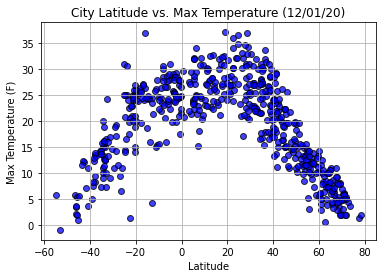

In [ ]:
#Latitude vs. Temperature Plot
plt.scatter(clean_cities_df["Lat"], clean_cities_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Max Temperature (12/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("output_data/Lat_vs_Temp.png")
plt.show()

## Latitude vs. Humidity Plot

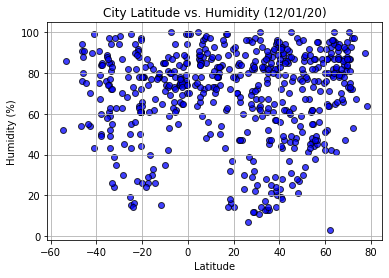

In [ ]:
#Latitude vs. Humidity Plot
plt.scatter(clean_cities_df["Lat"], clean_cities_df["Humidity"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Humidity (12/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("output_data/Lat_vs_Humidity.png")



## Latitude vs. Cloudiness Plot

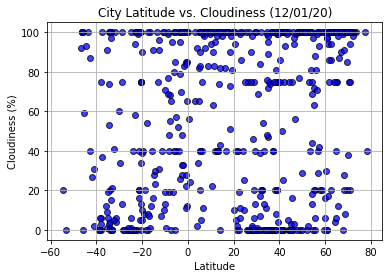

In [ ]:
#Latitude vs. Cloudiness Plot
plt.scatter(clean_cities_df["Lat"], clean_cities_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Cloudiness (12/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("output_data/Lat_vs_Cloudiness.png")


## Latitude vs. Wind Speed Plot

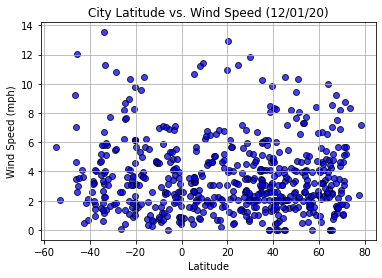

In [ ]:
#Latitude vs. Wind Speed Plot
plt.scatter(clean_cities_df["Lat"], clean_cities_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed (12/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("output_data/Lat_vs_WindSpeed.png")



## Linear Regression

In [ ]:
#Northern Hemisphere DataFrame
northern_hemisphere = clean_cities_df.loc[clean_cities_df["Lat"] >= 0]

#Southern Hemisphere DataFrame
southern_hemisphere = clean_cities_df.loc[clean_cities_df["Lat"] < 0]

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

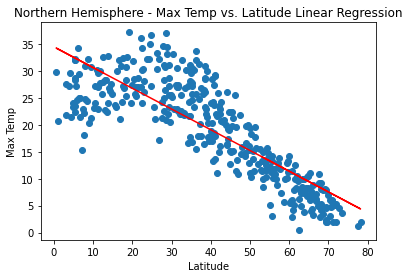

In [ ]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

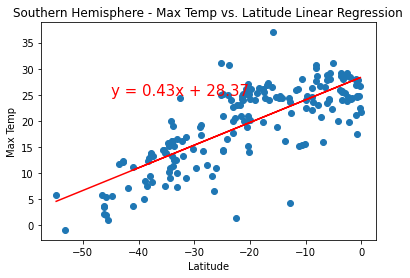

In [ ]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")


### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

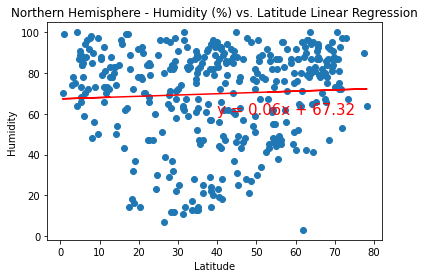

In [ ]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.savefig("output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

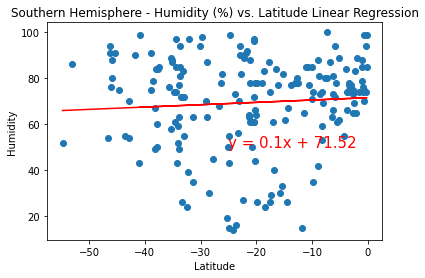

In [ ]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.savefig("output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

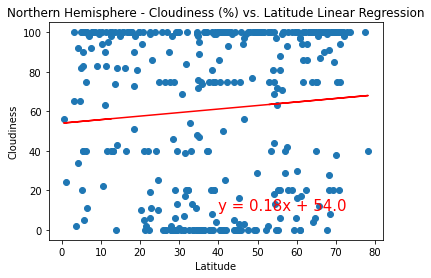

In [ ]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

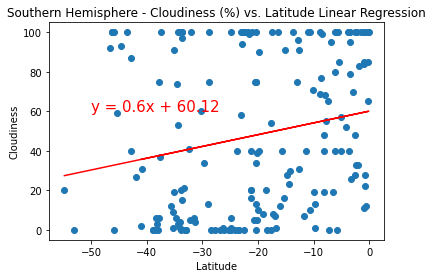

In [ ]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.savefig("output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")


### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

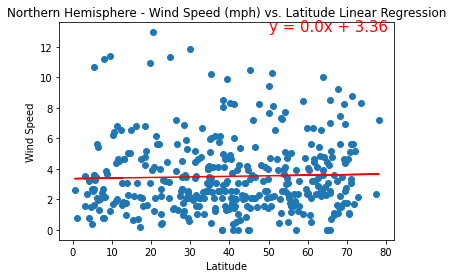

In [ ]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,13),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.savefig("output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

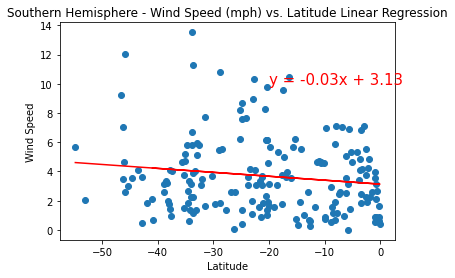

In [ ]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
#plt.text(str(line_eq), loc = 0)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.savefig("output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")


In [ ]:
Analysis:
1. Weather becomes warmer as we approach the equater. From the plot, the northern hemispher seems to be slightly warmer. 
2. There is not much relationship between latitude and wind speed.
3. There is not much relationship between latitude and cloudiness.
4. There is not much relationship between latitude and humidity.